6. Do counties with the highest levels of income disparity tend to have higher percentages of food insecurity? (Food Access Research Atlas and Census Household Income)

7. Of the counties with the highest levels of food insecurity, what percentage of these tracts are in the lowest income brackets? (Food Access Research Atlas and Census Household Income)

In [2]:
# conda activate geospatial

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [4]:
census = gpd.read_file('../data/census_income.geojson')

In [5]:
print(census.crs)
census.head()

EPSG:4326


,geoid,name,B19001001,"B19001001, Error",B19001002,"B19001002, Error",B19001003,"B19001003, Error",B19001004,"B19001004, Error",...,"B19001013, Error",B19001014,"B19001014, Error",B19001015,"B19001015, Error",B19001016,"B19001016, Error",B19001017,"B19001017, Error",geometry
0,04000US47,Tennessee,2713635.0,7405.0,144639.0,2807.0,122212.0,3595.0,111419.0,2673.0,...,4514.0,257232.0,4293.0,169567.0,3100.0,182209.0,3522.0,197980.0,3847.0,"MULTIPOLYGON (((-83.98762 36.58947, -83.98724 ..."
1,14000US47001020100,"Census Tract 201, Anderson, TN",1531.0,225.0,156.0,90.0,74.0,52.0,41.0,42.0,...,53.0,125.0,79.0,16.0,18.0,46.0,33.0,11.0,16.0,"MULTIPOLYGON (((-84.32016 35.99186, -84.32008 ..."
2,14000US47001020201,"Census Tract 202.01, Anderson, TN",2029.0,160.0,93.0,73.0,28.0,35.0,26.0,30.0,...,73.0,242.0,94.0,195.0,114.0,256.0,81.0,368.0,140.0,"MULTIPOLYGON (((-84.24333 36.00161, -84.24330 ..."
3,14000US47001020202,"Census Tract 202.02, Anderson, TN",1951.0,235.0,235.0,127.0,159.0,126.0,7.0,13.0,...,97.0,134.0,77.0,129.0,106.0,295.0,146.0,122.0,67.0,"MULTIPOLYGON (((-84.25132 36.00539, -84.25124 ..."
4,14000US47001020300,"Census Tract 203, Anderson, TN",1567.0,154.0,25.0,26.0,95.0,59.0,56.0,36.0,...,85.0,174.0,70.0,106.0,61.0,93.0,59.0,43.0,38.0,"MULTIPOLYGON (((-84.24401 36.04229, -84.24090 ..."


In [6]:
type(census)

geopandas.geodataframe.GeoDataFrame

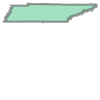

In [7]:
census.loc[0,'geometry']

In [8]:
print(census.loc[0,'geometry'])

MULTIPOLYGON (((-83.987615 36.589471, -83.987244 36.58946, -83.984438 36.589372, -83.974938 36.589074, -83.974867 36.589074, -83.970498 36.588934, -83.957537 36.58853, -83.957125 36.588517, -83.950694 36.588315, -83.950337 36.588304, -83.943231 36.588082, -83.930913 36.587698, -83.930762 36.587691, -83.930378 36.587679, -83.930049 36.587669, -83.923417 36.587464, -83.919509 36.587343, -83.916565 36.58725, -83.910903 36.587075, -83.906705 36.586946, -83.900275 36.586747, -83.900174 36.586744, -83.899676 36.586731, -83.899377 36.586721, -83.898869 36.586705, -83.898773 36.586702, -83.898686 36.586699, -83.897581 36.586664, -83.897512 36.586663, -83.896531 36.586631, -83.894629 36.586572, -83.89331 36.586532, -83.890058 36.586431, -83.883655 36.586233, -83.883582 36.586231, -83.883365 36.586225, -83.883293 36.586224, -83.874034 36.585934, -83.873541 36.585923, -83.865592 36.585734, -83.865211 36.585725, -83.861002 36.585625, -83.857038 36.585531, -83.854689 36.585476, -83.842282 36.585182

<Axes: >

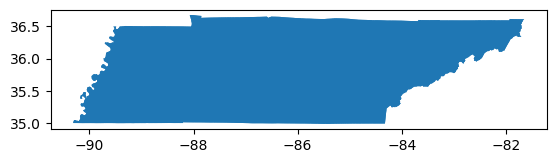

In [9]:
census.plot()

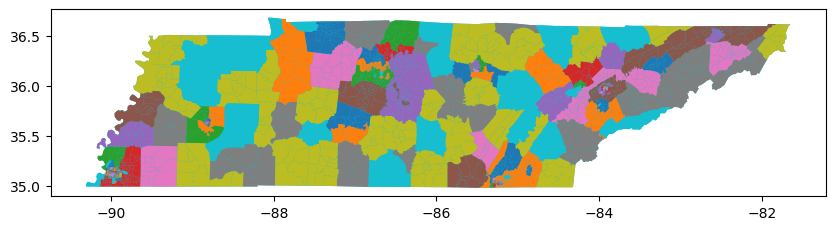

In [10]:
census.plot(column='name', figsize=(10,10))
plt.show()

In [11]:
tn_counties = gpd.read_file('../data/tn_counties.geojson')

In [12]:
print(tn_counties.crs)
tn_counties.head()

EPSG:4326


,OBJECTID,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,...,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,SHAPE_Length,SHAPE_Area,geometry
0,30,47,065,01639749,47065,Hamilton,Hamilton County,06,H1,G4020,...,16860,,A,1.404654e+09,86645833.0,+35.1634720,-085.2018432,1.988717,0.147573,"MULTIPOLYGON (((-85.29255 35.26292, -85.29239 ..."
1,65,47,115,01639770,47115,Marion,Marion County,06,H1,G4020,...,16860,,A,1.290468e+09,36484703.0,+35.1334215,-085.6183990,1.631306,0.131228,"MULTIPOLYGON (((-85.54388 35.30238, -85.54187 ..."
2,68,47,185,01639800,47185,White,White County,06,H1,G4020,...,,,A,9.755921e+08,7113369.0,+35.9270486,-085.4557854,1.870463,0.098137,"MULTIPOLYGON (((-85.64136 35.84077, -85.63988 ..."
3,129,47,129,01639778,47129,Morgan,Morgan County,06,H1,G4020,...,28940,,A,1.352440e+09,823018.0,+36.1386970,-084.6392616,1.906032,0.135494,"MULTIPOLYGON (((-84.79101 36.05854, -84.79185 ..."
4,182,47,013,01639728,47013,Campbell,Campbell County,06,H1,G4020,...,28940,,A,1.243616e+09,46494677.0,+36.4015922,-084.1592495,2.054030,0.129608,"MULTIPOLYGON (((-84.32222 36.39287, -84.32249 ..."


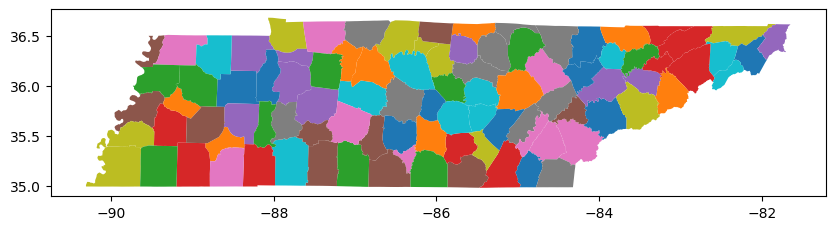

In [13]:
tn_counties.plot(column='NAME', figsize=(10,10))
plt.show()

In [14]:
avg_county_food_access = pd.read_csv('../data/tn_counties_and_averaged_food_access_data.csv')

In [15]:
print(avg_county_food_access.shape)
avg_county_food_access.head(3)

(95, 159)


,OBJECTID,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,county_and_state,NAMELSAD,region,LSAD,...,pct_o_multir,pct_hispanic,pct_no_vehicle,pct_lapop1_10,pct_lapop05_10,pct_lapop1_20,pct_lalowi1_10,pct_lalowi05_10,pct_lalowi1_20,pct_lapop1_20.1
0,2859,47,1,1639722,47001,Anderson,"Anderson, Tennessee",Anderson County,East,6,...,3.02,2.56,5.33,25.87,60.67,28.28,6.26,21.39,6.57,28.28
1,352,47,3,1639723,47003,Bedford,"Bedford, Tennessee",Bedford County,Middle,6,...,7.69,9.55,4.38,25.43,38.69,51.85,9.65,16.40,20.87,51.85
2,2757,47,5,1639724,47005,Benton,"Benton, Tennessee",Benton County,West,6,...,1.74,1.72,8.04,26.79,42.08,24.73,12.23,20.28,11.51,24.73


In [16]:
avg_county_food_access.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Columns: 159 entries, OBJECTID to pct_lapop1_20.1
dtypes: float64(140), int64(9), object(10)
memory usage: 118.1+ KB


In [17]:
# INTPTLAT
# INTPTLON


In [18]:
avg_county_food_access_geo = gpd.GeoDataFrame(avg_county_food_access,
                                              crs=tn_counties.crs,
                                              geometry=gpd.points_from_xy(avg_county_food_access.INTPTLON,avg_county_food_access.INTPTLAT))

In [19]:
tn_counties = tn_counties[['NAME','geometry', 'INTPTLON', 'INTPTLAT']]

In [20]:
counties_food_access = gpd.sjoin(tn_counties,avg_county_food_access_geo)

In [21]:
counties_food_access.head()

,NAME_left,geometry,INTPTLON_left,INTPTLAT_left,index_right,OBJECTID,STATEFP,COUNTYFP,COUNTYNS,GEOID,...,pct_o_multir,pct_hispanic,pct_no_vehicle,pct_lapop1_10,pct_lapop05_10,pct_lapop1_20,pct_lalowi1_10,pct_lalowi05_10,pct_lalowi1_20,pct_lapop1_20.1
0,Hamilton,"MULTIPOLYGON (((-85.29255 35.26292, -85.29239 ...",-085.2018432,+35.1634720,32,30,47,65,1639749,47065,...,4.58,4.78,8.00,46.81,82.35,46.81,15.96,29.75,15.96,46.81
1,Marion,"MULTIPOLYGON (((-85.54388 35.30238, -85.54187 ...",-085.6183990,+35.1334215,55,65,47,115,1639770,47115,...,1.75,1.28,5.09,28.03,44.53,56.02,13.14,22.10,26.29,56.02
2,White,"MULTIPOLYGON (((-85.64136 35.84077, -85.63988 ...",-085.4557854,+35.9270486,92,68,47,185,1639800,47185,...,1.83,1.65,4.66,29.03,34.36,76.76,16.91,19.66,44.29,76.76
3,Morgan,"MULTIPOLYGON (((-84.79101 36.05854, -84.79185 ...",-084.6392616,+36.1386970,64,129,47,129,1639778,47129,...,1.42,0.87,4.88,28.34,28.34,NaN,15.10,15.10,NaN,NaN
4,Campbell,"MULTIPOLYGON (((-84.32222 36.39287, -84.32249 ...",-084.1592495,+36.4015922,6,182,47,13,1639728,47013,...,1.36,1.05,9.34,25.81,35.61,22.40,12.22,16.56,8.43,22.40


In [22]:
from folium.plugins import HeatMap

In [23]:
heatmap_data = counties_food_access[['INTPTLAT_left', 'INTPTLON_left', 'pct_lalowi1_10']].dropna()

heatmap_attempt = folium.Map(location=[35.5175, 86.5804])
HeatMap(heatmap_data).add_to(heatmap_attempt)

heatmap_attempt.fit_bounds(heatmap_attempt.get_bounds(), padding=(30, 30))

In [24]:
heatmap_attempt

In [25]:
heatmap_data_2 = counties_food_access[['INTPTLAT_left', 'INTPTLON_left', 'pct_LOWI']].dropna()

heatmap_LOWI = folium.Map(location=[35.5175, 86.5804])
HeatMap(heatmap_data_2).add_to(heatmap_LOWI)

heatmap_LOWI.fit_bounds(heatmap_LOWI.get_bounds(), padding=(30, 30))

In [26]:
heatmap_LOWI

In [27]:
heatmap_data_3 = counties_food_access[['INTPTLAT_left', 'INTPTLON_left', 'pct_ohu_snap']].dropna()

heatmap_SNAP = folium.Map(location=[35.5175, 86.5804])
HeatMap(heatmap_data_3).add_to(heatmap_SNAP)

heatmap_SNAP.fit_bounds(heatmap_SNAP.get_bounds(), padding=(30, 30))

In [28]:
heatmap_SNAP

In [29]:
heatmap_data_4 = counties_food_access[['INTPTLAT_left', 'INTPTLON_left', 'pct_lapop1_10']].dropna()

heatmap_low_access = folium.Map(location=[35.5175, 86.5804])
HeatMap(heatmap_data_4).add_to(heatmap_low_access)

heatmap_low_access.fit_bounds(heatmap_low_access.get_bounds(), padding=(30, 30))

In [30]:
heatmap_low_access